## Q1

Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a
random kernel of size (3,3) using torch.nn.functional.conv2d. 

What is the dimension of the output image? Apply, various values for parameter stride=1 and note the change in the dimension of the output image. Arrive at an equation for the output image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using kernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code.

In [1]:
import torch
import torch.nn.functional as F

image = torch.rand(6,6)
print("image=", image)
#Add a new dimension along 0th dimension
#i.e. (6,6) becomes (1,6,6). This is because
#pytorch expects the input to conv2D as 4d tensor
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)
print("image=", image)
kernel = torch.ones(3,3)
#kernel = torch.rand(3,3)
print("kernel=", kernel)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

def out_dim(in_shape,stride,padding,kernel_shape):
    out_shape = [0 for i in range(4)]
    for dim in range(len(in_shape)):
        out_shape[dim] = (in_shape[dim] + 2*padding - kernel_shape[dim])//stride + 1
    return out_shape
    
#Stride 1 Padding 0
outimage = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage=", outimage)
print("Dimension of output image S-1 P-0: ",outimage.shape)
print("Manually dim of output S-1 P-0: ",out_dim(image.shape,1,0,kernel.shape))

#Stride 1 Padding 1
outimage = F.conv2d(image, kernel, stride=1, padding=1)
print("Dimension of output image S-1 P-1:",outimage.shape)
print("Manually dim of output S-1 P-1: ",out_dim(image.shape,1,1,kernel.shape))

#Stride 1 Padding 2
outimage = F.conv2d(image, kernel, stride=1, padding=2)
print("Dimension of output image S-1 P-2:",outimage.shape)
print("Manually dim of output S-1 P-2: ",out_dim(image.shape,1,2,kernel.shape))

#Stride 2 Padding 1
outimage = F.conv2d(image, kernel, stride=2, padding=1)
print("Dimension of output image S-2 P-1: ",outimage.shape)
print("Manually dim of output S-2 P-1: ",out_dim(image.shape,2,1,kernel.shape))

#Stride 3 Padding 1
outimage = F.conv2d(image, kernel, stride=3, padding=1)
print("Dimension of output image S-2 P-1:",outimage.shape)
print("Manually dim of output S-3 P-1: ",out_dim(image.shape,3,1,kernel.shape))

print("Number of Learnable Parameters = 9")

image= tensor([[0.9639, 0.2708, 0.3234, 0.9133, 0.3223, 0.8420],
        [0.8119, 0.0347, 0.5326, 0.3417, 0.8358, 0.9684],
        [0.9019, 0.5281, 0.7605, 0.0390, 0.9906, 0.3970],
        [0.6022, 0.7848, 0.7749, 0.6226, 0.3611, 0.5193],
        [0.7980, 0.4499, 0.7924, 0.3650, 0.7416, 0.3754],
        [0.3243, 0.4975, 0.8319, 0.3352, 0.9380, 0.7966]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
image= tensor([[[[0.9639, 0.2708, 0.3234, 0.9133, 0.3223, 0.8420],
          [0.8119, 0.0347, 0.5326, 0.3417, 0.8358, 0.9684],
          [0.9019, 0.5281, 0.7605, 0.0390, 0.9906, 0.3970],
          [0.6022, 0.7848, 0.7749, 0.6226, 0.3611, 0.5193],
          [0.7980, 0.4499, 0.7924, 0.3650, 0.7416, 0.3754],
          [0.3243, 0.4975, 0.8319, 0.3352, 0.9380, 0.7966]]]])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage= tensor([[[[5.1277, 3.7440, 5.0592, 5.6501],
          [5.7316, 4.4189, 5.2589, 5.0755],
          [6.3927, 5.1173, 5

## Q2 

Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the
output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D
to get the same output. You may ignore bias.

In [2]:
import torch.nn as nn
import torch

image= torch.tensor([[[[0.2557, 0.9236, 0.4913, 0.3200, 0.4958, 0.2214],
          [0.7554, 0.6501, 0.0107, 0.8675, 0.5163, 0.6102],
          [0.8228, 0.1919, 0.8724, 0.8043, 0.3882, 0.9689],
          [0.4894, 0.5116, 0.5624, 0.6949, 0.6289, 0.9802],
          [0.3913, 0.2773, 0.1427, 0.3717, 0.4154, 0.3669],
          [0.8327, 0.8157, 0.7192, 0.9387, 0.4569, 0.6776]]]])

conv = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,stride=1,padding=0,bias=False)
print("Kernel parameters for 3 channels: ")
kernel = conv.weight
print(conv.weight)
print("Output image using torch.nn.Conv2d: ")
out_image = print(conv(image))

import torch.nn.functional as F
out_image = F.conv2d(image,kernel,stride=1,padding=0)
print("Output image using torch.nn.functional.conv2d: ")
print(out_image)

Kernel parameters for 3 channels: 
Parameter containing:
tensor([[[[-0.1506,  0.2808,  0.0680],
          [ 0.0190,  0.1268,  0.2866],
          [-0.1762, -0.0606,  0.1602]]],


        [[[ 0.1400, -0.3048, -0.1191],
          [-0.1460,  0.2342,  0.2060],
          [ 0.2009, -0.0864,  0.0813]]],


        [[[ 0.3144, -0.1243, -0.0555],
          [-0.1734,  0.2955,  0.0847],
          [-0.3252, -0.2590, -0.2927]]]], requires_grad=True)
Output image using torch.nn.Conv2d: 
tensor([[[[ 0.3373,  0.3251,  0.1675,  0.3529],
          [ 0.3324,  0.2960,  0.4665,  0.3945],
          [ 0.1618,  0.5531,  0.4188,  0.3958],
          [ 0.1108,  0.2211,  0.2117,  0.2190]],

         [[-0.0404,  0.0563,  0.3575,  0.1941],
          [ 0.1107,  0.4371, -0.0794,  0.2294],
          [ 0.1833, -0.0610,  0.0713,  0.1953],
          [ 0.0381,  0.0650,  0.0443,  0.1117]],

         [[-0.5723, -0.3482, -0.2202, -0.5652],
          [-0.3122, -0.0678, -0.5608, -0.4437],
          [ 0.0595, -0.1923,  0.0496, -0

## Q3 

Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(64,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(128,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(64,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
        
print(f"Correct = {correct}, Total = {total}")

[1,   100] loss: 2.308
[1,   200] loss: 2.300
[1,   300] loss: 2.290
[1,   400] loss: 2.278
[1,   500] loss: 2.260
[1,   600] loss: 2.227
[1,   700] loss: 2.166
[1,   800] loss: 2.036
[1,   900] loss: 1.802
[1,  1000] loss: 1.477
[1,  1100] loss: 1.195
[1,  1200] loss: 0.966
[2,   100] loss: 0.783
[2,   200] loss: 0.689
[2,   300] loss: 0.624
[2,   400] loss: 0.545
[2,   500] loss: 0.498
[2,   600] loss: 0.452
[2,   700] loss: 0.405
[2,   800] loss: 0.361
[2,   900] loss: 0.356
[2,  1000] loss: 0.344
[2,  1100] loss: 0.308
[2,  1200] loss: 0.290
[3,   100] loss: 0.285
[3,   200] loss: 0.279
[3,   300] loss: 0.269
[3,   400] loss: 0.247
[3,   500] loss: 0.224
[3,   600] loss: 0.217
[3,   700] loss: 0.227
[3,   800] loss: 0.212
[3,   900] loss: 0.215
[3,  1000] loss: 0.194
[3,  1100] loss: 0.217
[3,  1200] loss: 0.209
[4,   100] loss: 0.186
[4,   200] loss: 0.188
[4,   300] loss: 0.178
[4,   400] loss: 0.188
[4,   500] loss: 0.178
[4,   600] loss: 0.175
[4,   700] loss: 0.172
[4,   800] 

## Q4

Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of
percentage drop in parameters vs accuracy.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

class CNNClassifier1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(16,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(16,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = CNNClassifier1().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model1.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

correct,total = 0,0
for i,vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model1(tinputs)

    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
        
print(f"Correct = {correct}, Total = {total}")

[1,   100] loss: 2.300
[1,   200] loss: 2.291
[1,   300] loss: 2.271
[1,   400] loss: 2.249
[1,   500] loss: 2.199
[1,   600] loss: 2.108
[1,   700] loss: 1.883
[1,   800] loss: 1.527
[1,   900] loss: 1.202
[1,  1000] loss: 0.996
[1,  1100] loss: 0.855
[1,  1200] loss: 0.772
[2,   100] loss: 0.689
[2,   200] loss: 0.608
[2,   300] loss: 0.569
[2,   400] loss: 0.530
[2,   500] loss: 0.520
[2,   600] loss: 0.456
[2,   700] loss: 0.423
[2,   800] loss: 0.379
[2,   900] loss: 0.405
[2,  1000] loss: 0.388
[2,  1100] loss: 0.388
[2,  1200] loss: 0.307
[3,   100] loss: 0.314
[3,   200] loss: 0.336
[3,   300] loss: 0.323
[3,   400] loss: 0.345
[3,   500] loss: 0.292
[3,   600] loss: 0.284
[3,   700] loss: 0.276
[3,   800] loss: 0.254
[3,   900] loss: 0.283
[3,  1000] loss: 0.278
[3,  1100] loss: 0.267
[3,  1200] loss: 0.258
[4,   100] loss: 0.262
[4,   200] loss: 0.236
[4,   300] loss: 0.232
[4,   400] loss: 0.242
[4,   500] loss: 0.228
[4,   600] loss: 0.231
[4,   700] loss: 0.225
[4,   800] 

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

mnist_trainset = datasets.MNIST(root="./data",download = True,train=True,transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50,shuffle=True)
mnist_testset = datasets.MNIST(root="./data",download = True,train=False,transform=ToTensor())
test_loader = DataLoader(mnist_testset,batch_size=50,shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.CrossEntropyLoss()

class CNNClassifier1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(128,256,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(256,128,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(128,64,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(64,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

class CNNClassifier2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,64,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(64,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(32,20,bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))
    
class CNNClassifier3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(16,32,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                 nn.Conv2d(32,16,3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2,2),stride=2),
                                )
        self.classification_head = nn.Sequential(nn.Linear(16,10,bias=True),)
        
    def forward(self,x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size,-1))

model1 = CNNClassifier1().to(device)
model2 = CNNClassifier2().to(device)
model3 = CNNClassifier3().to(device)
optimizer = optim.SGD(model1.parameters(), lr=0.01)
batch_size=50
loss = None
total_params = 0

for name,param in model1.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model1(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

optimizer = optim.SGD(model2.parameters(), lr=0.01)
batch_size=50
loss = None
total_params = 0

for name,param in model2.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model2(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")


loss = None
optimizer = optim.SGD(model3.parameters(), lr=0.01)
batch_size=50

total_params = 0
for name,param in model3.named_parameters():
    params = param.numel()
    total_params += params

for epoch in range(6):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model3(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

[1,   100] loss: 2.304
[1,   200] loss: 2.297
[1,   300] loss: 2.296
[1,   400] loss: 2.290
[1,   500] loss: 2.282
[1,   600] loss: 2.273
[1,   700] loss: 2.249
[1,   800] loss: 2.220
[1,   900] loss: 2.163
[1,  1000] loss: 2.068
[1,  1100] loss: 1.913
[1,  1200] loss: 1.639
[2,   100] loss: 1.375
[2,   200] loss: 1.124
[2,   300] loss: 0.903
[2,   400] loss: 0.767
[2,   500] loss: 0.627
[2,   600] loss: 0.551
[2,   700] loss: 0.485
[2,   800] loss: 0.399
[2,   900] loss: 0.377
[2,  1000] loss: 0.393
[2,  1100] loss: 0.337
[2,  1200] loss: 0.309
[3,   100] loss: 0.324
[3,   200] loss: 0.311
[3,   300] loss: 0.257
[3,   400] loss: 0.251
[3,   500] loss: 0.262
[3,   600] loss: 0.238
[3,   700] loss: 0.236
[3,   800] loss: 0.237
[3,   900] loss: 0.227
[3,  1000] loss: 0.199
[3,  1100] loss: 0.215
[3,  1200] loss: 0.199
[4,   100] loss: 0.195
[4,   200] loss: 0.197
[4,   300] loss: 0.183
[4,   400] loss: 0.184
[4,   500] loss: 0.178
[4,   600] loss: 0.179
[4,   700] loss: 0.160
[4,   800] 

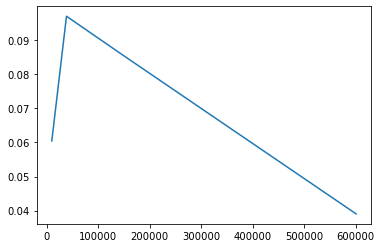

In [6]:
losses = [0.03902818262577057,0.08542836457490921,0.09705353528261185,0.06044217571616173]
params = [601254,149798,38150,9594]
import matplotlib.pyplot as plt
plt.plot(params,losses)